In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
books = pd.read_csv("data/Books.csv")
ratings = pd.read_csv("data/Ratings.csv")
users = pd.read_csv("data/Users.csv")

C:\Users\Ayush Gandhi\AppData\Local\Temp\ipykernel_14712\1055836222.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("data/Books.csv")


In [4]:
#Data Cleaning
#book-1.1
books.loc[books.ISBN == '078946697X','Image-URL-L'] = 'http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','Image-URL-M'] = 'http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '078946697X','Image-URL-S'] = 'http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '078946697X','Publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = '2000'
books.loc[books.ISBN == '078946697X','Book-Author'] = 'Michael Teitelbaum'
books.loc[books.ISBN == '078946697X','Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'

In [5]:
#book-1.2
books.loc[books.ISBN == '0789466953','Image-URL-L'] = 'http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','Image-URL-M'] = 'http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '0789466953','Image-URL-S'] = 'http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '0789466953','Publisher'] = 'DK Publishing Inc'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = '2000'
books.loc[books.ISBN == '0789466953','Book-Author'] = 'James Buckley'
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [6]:
books.loc[books.ISBN == '2070426769','Image-URL-L'] = 'http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','Image-URL-M'] = 'http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg'
books.loc[books.ISBN == '2070426769','Image-URL-S'] = 'http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg'
books.loc[books.ISBN == '2070426769','Publisher'] = 'Gallimard'
books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = '2003'
books.loc[books.ISBN == '2070426769','Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271360 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
#Data Visualization

sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set_palette('rainbow')

<Axes: title={'center': 'Count Plot of ratings'}, xlabel='Book-Rating', ylabel='count'>

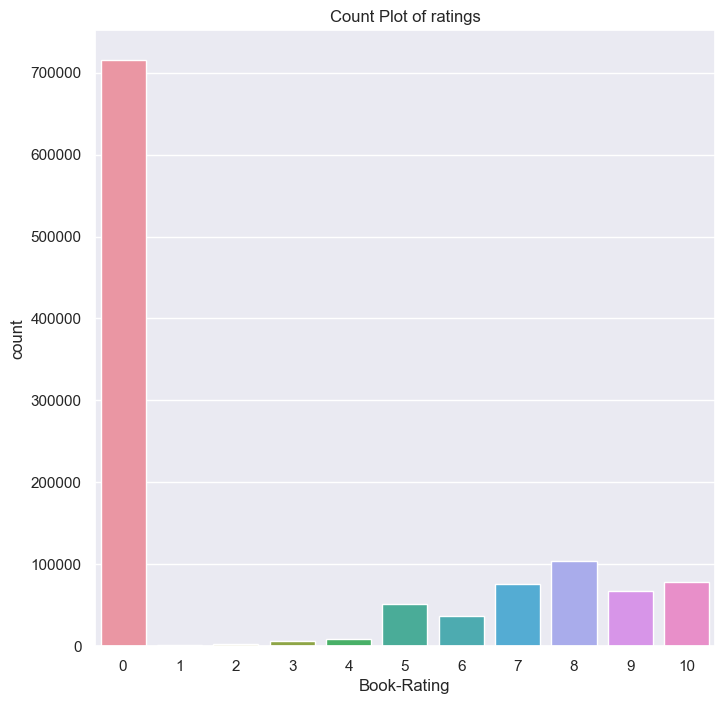

In [11]:
#Let's visusalize no of ratings for books with count plot

plt.figure(figsize=(8,8))
plt.title("Count Plot of ratings")
sns.countplot(x = "Book-Rating", data = ratings)

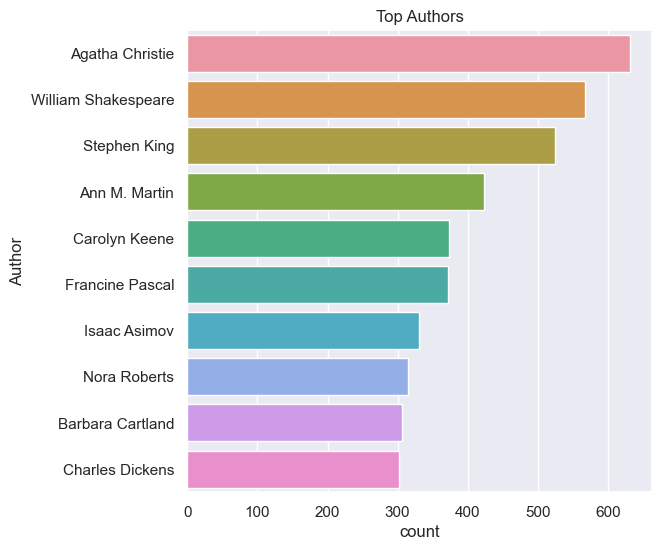

In [12]:
#top authors in the books

top_author = books["Book-Author"].value_counts().reset_index()
top_author.columns = ['Author', 'count']
top_author['Author'] = top_author['Author']
top_author = top_author.sort_values('count',ascending=False)

plt.figure(figsize=(6,6))
plt.title('Top Authors')
sns.barplot(data = top_author.head(10), x = 'count', y = 'Author');

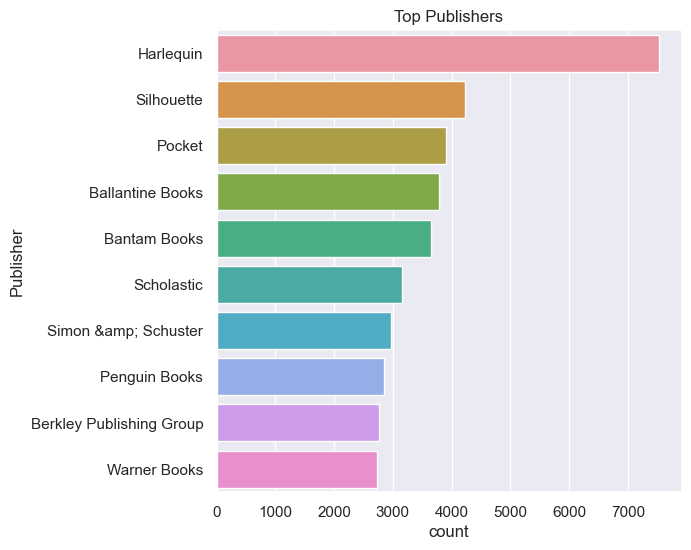

In [13]:
top_publisher = books["Publisher"].value_counts().reset_index()
top_publisher.columns = ['Publisher', 'count']
top_publisher['Publisher'] = top_publisher['Publisher']
top_publisher = top_publisher.sort_values('count',ascending=False)

plt.figure(figsize=(6, 6))
plt.title('Top Publishers')
sns.barplot(data = top_publisher.head(10), x = 'count', y = 'Publisher');

In [14]:
#Model Trainer
#We will consider the users who have voted more then 100 books

x = ratings["User-ID"].value_counts() > 100

In [15]:
x[x].shape

(1825,)

In [16]:
y = x[x].index

In [18]:
ratings = ratings[ratings["User-ID"].isin(y)]

In [19]:
ratings

,User-ID,ISBN,Book-Rating
412,276925,0006511929,0
413,276925,002542730X,10
414,276925,0060520507,0
415,276925,0060930934,0
416,276925,0060951303,0
...,...,...,...
1149633,276680,1884910033,0
1149634,276680,1888173408,7
1149635,276680,1888173564,8
1149636,276680,1888173572,0


In [20]:
ratings_with_books = ratings.merge(books, on = "ISBN")

In [21]:
ratings_with_books.shape

(604854, 10)

In [23]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [25]:
num_rating = ratings_with_books.groupby("Book-Title")["Book-Rating"].count().reset_index()

In [26]:
num_rating.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,3
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [27]:
ratings_with_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
...,...,...,...,...,...,...,...,...,...,...
604849,276680,089587167X,7,Something Blue,Jean Christopher Spaugh,1997,John F. Blair Publisher,http://images.amazon.com/images/P/089587167X.0...,http://images.amazon.com/images/P/089587167X.0...,http://images.amazon.com/images/P/089587167X.0...
604850,276680,1402201435,4,The One True Ocean,Sarah Beth Martin,2003,Sourcebooks Landmark,http://images.amazon.com/images/P/1402201435.0...,http://images.amazon.com/images/P/1402201435.0...,http://images.amazon.com/images/P/1402201435.0...
604851,276680,1564407284,0,"The Old Sturbridge Village Cookbook, 2nd : Aut...",Caroline Sloat,1995,Globe Pequot,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...,http://images.amazon.com/images/P/1564407284.0...
604852,276680,1582343594,0,City of Masks : A Cree Black Novel,Daniel Hecht,2004,Bloomsbury USA,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...,http://images.amazon.com/images/P/1582343594.0...


In [29]:
final_ratings = ratings_with_books.merge(num_rating, on = "Book-Title")

In [30]:
final_ratings.head()

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_y
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105


In [31]:
final_ratings.shape

(604854, 11)

In [36]:
#We will filter out books who has got more then 50 ratings
final_ratings = final_ratings[final_ratings["Book-Rating_y"]>50]

In [38]:
final_ratings.shape

(98726, 11)

In [39]:
final_ratings.drop_duplicates(["Book-Title", "User-ID"], inplace= True)

C:\Users\Ayush Gandhi\AppData\Local\Temp\ipykernel_14712\656921125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_ratings.drop_duplicates(["Book-Title", "User-ID"], inplace= True)


In [40]:
final_ratings.shape

(96289, 11)

In [42]:
final_ratings.head()

,User-ID,ISBN,Book-Rating_x,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_y
0,276925,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105
1,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105
2,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105
3,10030,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105
4,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,105


In [44]:
book_pivot = final_ratings.pivot_table(columns="User-ID", index = "Book-Title", values = "Book-Rating_x")

In [45]:
book_pivot

User-ID,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
book_pivot.fillna(0, inplace = True)

In [47]:
book_pivot

User-ID,183,254,507,882,1424,1435,1733,1903,2033,2110,...,276018,276463,276680,276925,277427,277478,277639,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from scipy.sparse import csr_matrix

In [49]:
book_sparse = csr_matrix(book_pivot)

In [50]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= "brute")

In [51]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [52]:
books_name = book_pivot.index

In [57]:
import pickle

In [59]:
import os

# Check if the 'artifacts' directory exists, if not, create it
if not os.path.exists("artifacts"):
    os.makedirs("artifacts")

In [61]:
artifacts_dir = "../artifacts"
if not os.path.exists(artifacts_dir):
    os.makedirs(artifacts_dir)

# Now, you can use the artifacts_dir variable to specify the path for your pickle files
pickle.dump(model, open(os.path.join(artifacts_dir, "model.pkl"), "wb"))
pickle.dump(books_name, open(os.path.join(artifacts_dir, "books_names.pkl"), "wb"))
pickle.dump(final_ratings, open(os.path.join(artifacts_dir, "final_rating.pkl"), "wb"))
pickle.dump(book_pivot, open(os.path.join(artifacts_dir, "book_pivot.pkl"), "wb"))

In [62]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)
    
    for i in range(len(suggestion)):
        books = book_pivot.index[suggestion[i]]
        
        for j in books:
            print(j)

In [63]:
book_name = "A Bend in the Road"

In [64]:
recommend_book(book_name)

A Bend in the Road
Protect and Defend
Personal Injuries
True Blue
Critical Judgment
Tom Clancy's Op-Center: Games of State (Tom Clancy's Op Center (Paperback))
